In [15]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

    # Define the system of ODEs
def stringSolve(L,  # Length of the string
    T,  # Total time of the simulation
    N,  # Number of spatial points
    c,  # Wave speed
    f, #drive Frequency
    A, #drive amplitude
    alpha,  # Damping coefficient
    dt,  # Time step
    initial_conditions,
    forcing #drive function(t)
):

    dx = L / N,  # Spatial step
    x = np.linspace(0, L, N),  # Spatial vector
    def damped_string(t, y):
        displacement = y[:N]
        velocity = y[N:]

        # Spatial derivatives (fixed boundary conditions)
        d2y_dx2 = np.zeros_like(displacement)
        d2y_dx2[1:-1] = (displacement[:-2] - 2 * displacement[1:-1] + displacement[2:]) / dx**2

        # Damping term
        damping_term = -alpha * velocity

        # Forcing term
        F = np.zeros_like(displacement)
        F[N // 4] = forcing(t)

        # Time derivatives
        d_displacement_dt = velocity
        d_velocity_dt = c**2 * d2y_dx2 + damping_term + F

        return np.concatenate([d_displacement_dt, d_velocity_dt])



    # Solve the PDE
    sol = solve_ivp(damped_string, [0, T], initial_conditions, t_eval=np.arange(0, T, dt), vectorized=True)
    return sol

In [16]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

# Parameters
L       = 1  # Length of the string
T       = 60  # Total time of the simulation
N       = 400  # Number of spatial points
c       = 1  # Wave speed
f       = 3 #drive Frequency
A       = 1 #drive amplitude
alpha = 10  # Damping coefficient
dx = L / N  # Spatial step
dt = 0.001  # Time step
x = np.linspace(0, L, N)  # Spatial vector

# Initial conditions
initial_displacement = np.zeros(N)
#initial_displacement[N//2]  = 100
initial_velocity = np.zeros(N)
initial_conditions = np.concatenate([initial_displacement, initial_velocity])


# Forcing function (sine wave at the center of the string)
def sinDrive(t):
    return A * np.sin((2 * np.pi * f * t)+np.pi/4)

def noiseDrive(t):
    return A* np.random.normal(0, 1)

def noDrive(t):
    return 0

'''stringSolve(L,  # Length of the string
    T,  # Total time of the simulation
    N,  # Number of spatial points
    c,  # Wave speed
    f, #drive Frequency
    A, #drive amplitude
    alpha,  # Damping coefficient
    dt,  # Time step
    initial_conditions,
    noDrive) #drive function(t))'''


# Define the system of ODEs
def damped_string(t, y, forcing):
    displacement = y[:N]
    velocity = y[N:]

    # Spatial derivatives (fixed boundary conditions)
    d2y_dx2 = np.zeros_like(displacement)
    d2y_dx2[1:-1] = (displacement[:-2] - 2 * displacement[1:-1] + displacement[2:]) / dx**2

    # Damping term
    damping_term = -alpha * velocity

    # Forcing term
    F = np.zeros_like(displacement)
    F[N // 4] = forcing(t)

    # Time derivatives
    d_displacement_dt = velocity
    d_velocity_dt = c**2 * d2y_dx2 + damping_term + F

    return np.concatenate([d_displacement_dt, d_velocity_dt])



# Solve the PDE
sol = solve_ivp(damped_string, [0, T], initial_conditions, t_eval=np.arange(0, T, dt), vectorized=True)

# Extract and normalize the solution
y_solution = sol.y[:N, :].T
y_solution = y_solution / np.max(np.abs(y_solution))



TypeError: damped_string() missing 1 required positional argument: 'forcing'

In [13]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

# Parameters

x = np.linspace(0, L, N)  # Spatial vector

# Initial conditions
initial_displacement = np.zeros(N)
#initial_displacement[N//2]  = 100
initial_velocity = np.zeros(N)
initial_conditions = np.concatenate([initial_displacement, initial_velocity])


# Forcing function (sine wave at the center of the string)
def forcing(t):
    #return A * np.sin(2 * np.pi * f * t)
    return A* np.random.normal(0, 1)

# Define the system of ODEs
def damped_string(t, y):
    displacement = y[:N]
    velocity = y[N:]

    # Spatial derivatives (fixed boundary conditions)
    d2y_dx2 = np.zeros_like(displacement)
    d2y_dx2[1:-1] = (displacement[:-2] - 2 * displacement[1:-1] + displacement[2:]) / dx**2

    # Damping term
    damping_term = -alpha * velocity

    # Forcing term
    F = np.zeros_like(displacement)
    F[N // 4] = forcing(t)

    # Time derivatives
    d_displacement_dt = velocity
    d_velocity_dt = c**2 * d2y_dx2 + damping_term + F

    return np.concatenate([d_displacement_dt, d_velocity_dt])
    
# Solve the PDE
sol = solve_ivp(damped_string, [0, T], initial_conditions, t_eval=np.arange(0, T, dt), vectorized=True)
# Extract and normalize the solution
y_solution_noise = sol.y[:N, :].T
y_solution_noise = y_solution_noise / np.max(np.abs(y_solution_noise))



In [11]:
power_spectrum_noise = np.zeros(len(sol.y[:N, :].T)//2)
for i in range(10):
    print('ON ITTERATION', i)
    sol = solve_ivp(damped_string, [0, T], initial_conditions, t_eval=np.arange(0, T, dt), vectorized=True)

    # Extract and normalize the solution
    y_solution_noise = sol.y[:N, :].T
    y_solution_noise = y_solution_noise / np.max(np.abs(y_solution_noise))

    # Compute the Fourier transform
    position_index = int(3*N // 4)

    # Extract the time series for that position
    time_series_noise = y_solution_noise[:, position_index]

    frequencies_noise = np.fft.fftfreq(len(time_series_noise), d=(T / len(time_series_noise)))
    positive_frequencies = frequencies_noise[frequencies_noise >= 0]

    time_series_noise = y_solution_noise[:, position_index]

    # Compute the Fourier transform
    FFT_values_noise = fft(time_series_noise)
    positive_FFT_values_noise = FFT_values_noise[frequencies_noise >= 0]

    # Compute the power spectrum (magnitude squared)
    power_spectrum_noise += np.abs(positive_FFT_values_noise)**2
power_spectrum_noise /= 10

ON ITTERATION 0


KeyboardInterrupt: 

NameError: name 'y_solution' is not defined

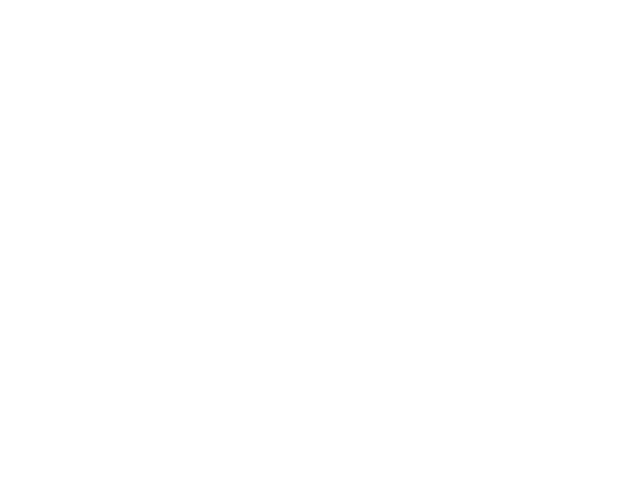

In [14]:
# Visualize
plt.close('all')
plt.figure()
plt.imshow(y_solution, extent=[0, L, 0, T], origin='lower', aspect='auto', cmap='viridis')
plt.xlabel('Position along the string')
plt.ylabel('Time')
plt.colorbar(label='Displacement')
plt.show()

plt.figure()
plt.imshow(y_solution_noise, extent=[0, L, 0, T], origin='lower', aspect='auto', cmap='viridis')
plt.xlabel('Position along the string')
plt.ylabel('Time')
plt.colorbar(label='Displacement')
plt.show()

In [17]:
from scipy.fft import fft

# Choose a specific position (e.g., the middle of the string)
position_index = int(3*N // 4)

# Extract the time series for that position
print(y_solution.shape)
time_series = y_solution[100:, position_index]

# Compute the Fourier transform
frequencies = np.fft.fftfreq(len(time_series), d=(T / len(time_series)))
positive_frequencies = frequencies[frequencies >= 0]
FFT_values = fft(time_series)
positive_FFT_values = FFT_values[frequencies >= 0]

# Compute the power spectrum (magnitude squared)
power_spectrum = np.abs(positive_FFT_values)**2

#noisy
time_series_noise = y_solution_noise[100:, position_index]

# Compute the Fourier transform
FFT_values_noise = fft(time_series_noise)
positive_FFT_values_noise = FFT_values_noise[frequencies >= 0]

# Compute the power spectrum (magnitude squared)
power_spectrum_noise = np.abs(positive_FFT_values_noise)**2

# Plot the power spectrum
plt.close('all')
plt.figure()
plt.plot(positive_frequencies, 10*np.log10(power_spectrum))
plt.plot(positive_frequencies, 10*np.log10(power_spectrum_noise))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.title(f'Power Spectrum. Position x = {round(x[position_index],2)}. Length = {T}' )
plt.grid()
plt.show()


NameError: name 'y_solution' is not defined

In [66]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0  # Length of the string
T = 20  # Total time of the simulation
N = 100  # Number of spatial points
c = 1.0  # Wave speed
alpha = 0.05  # Damping coefficient
dx = L / N  # Spatial step
dt = 0.001  # Time step
x = np.linspace(0, L, N)  # Spatial vector

# Initial conditions
initial_displacement = np.zeros(N)
initial_velocity = np.zeros(N)
initial_conditions = np.concatenate([initial_displacement, initial_velocity])

# Forcing function (sine wave at the center of the string)
def driving_force(t):
    force = np.zeros(N)
    force[N//2] = A * np.sin(2 * np.pi * f * t) # Apply at the center
    return force


# Define the system of ODEs
def damped_string(t, y):
    displacement = y[:N]
    velocity = y[N:]

    # Spatial derivatives
    d2y_dx2 = (np.roll(displacement, 1) - 2 * displacement + np.roll(displacement, -1)) / dx**2

    # Damping term
    damping_term = -2 * alpha * velocity

    # Forcing term
    F = np.zeros_like(displacement)
    F[N // 2] = driving_force(t)

    # Time derivatives
    d_displacement_dt = velocity
    d_velocity_dt = c**2 * d2y_dx2 + damping_term + F

    return np.concatenate([d_displacement_dt, d_velocity_dt])

# Solve the PDE
sol = solve_ivp(damped_string, [0, T], initial_conditions, t_eval=np.arange(0, T, dt), vectorized=True)

# Extract and normalize the solution
y_solution = sol.y[:N, :].T
y_solution = y_solution / np.max(np.abs(y_solution))

# Visualize
plt.close('all')
plt.figure()
plt.imshow(y_solution, extent=[0, L, 0, T], origin='lower', aspect='auto', cmap='viridis')
plt.xlabel('Position along the string')
plt.ylabel('Time')
plt.colorbar(label='Displacement')
plt.show()


ValueError: could not broadcast input array from shape (100,) into shape (1,)

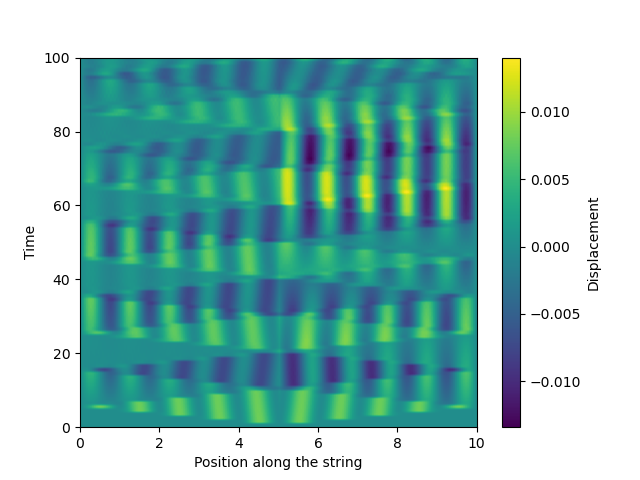

In [74]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10  # Length of the string
T = 100  # Total time
N = 200 # Number of spatial points
c = 1   # Wave speed
f = 1   # Frequency of sine wave
A = 1   # Amplitude of sine wave
alpha = 0.01 # Damping coefficient

# Spatial grid
x = np.linspace(0, L, N)
dx = x[1] - x[0]

# Initial condition
y0 = np.zeros(N)
v0 = np.zeros(N)

# Function for driving force (sine wave for now)
def driving_force(t):
    force = np.zeros(N)
    force[N//2] = A * np.sin(2 * np.pi * f * t) # Apply at the center
    return force

# Define the PDE system
def pde(t, yv):
    y = yv[:N]
    v = yv[N:]
    dydt = v
    d2ydx2 = np.zeros(N)
    d2ydx2[1:-1] = (y[:-2] - 2*y[1:-1] + y[2:]) / dx**2
    # Fixed boundary conditions (zero displacement at the ends)
    d2ydx2[0] = d2ydx2[-1] = 0
    # Adding damping term
    dvdt = c**2 * d2ydx2 - alpha * v + driving_force(t)
    return np.concatenate((dydt, dvdt))

# Solve the PDE system
sol = solve_ivp(pde, [0, T], np.concatenate((y0, v0)), t_eval=np.linspace(0, T, 100))

# Extract solution and visualize
y_solution = sol.y[:N, :].T

plt.close('all')
plt.figure()
plt.imshow(y_solution, extent=[0, L, 0, T], origin='lower', aspect='auto', cmap='viridis')
plt.xlabel('Position along the string')
plt.ylabel('Time')
plt.colorbar(label='Displacement')
plt.show()


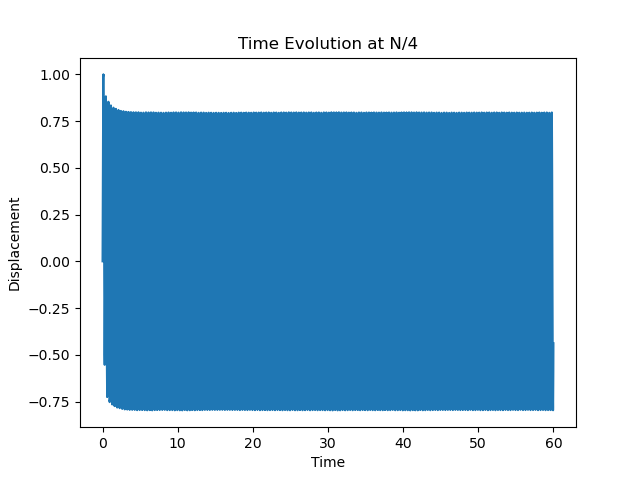

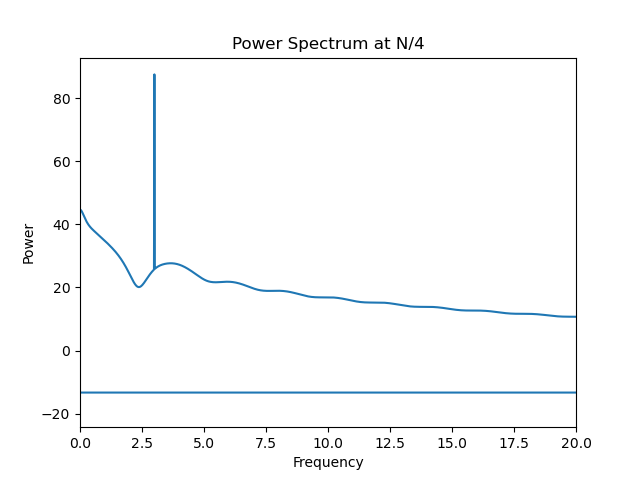

In [19]:
plt.figure()
plt.plot(sol.t, y_solution[:, N // 4])
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Time Evolution at N/4')
plt.show()

# Compute and plot the power spectrum at the same location
from scipy.fft import fft
power_spectrum = np.abs(fft(y_solution[:, N // 4]))**2
freqs = np.fft.fftfreq(len(sol.t), d=dt)
plt.figure()
plt.plot(freqs, 10*np.log10(power_spectrum))
plt.xlim(0,20)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Power Spectrum at N/4')
plt.show()